# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# **Load Data**

In [2]:
data = np.loadtxt("CP_Kronos1_Logs_depth.las", skiprows=41)

logs = ['DEPT', 'ADJS1', 'ADJS2', 'CALI', 'DTCO', 'DTCO_inp', 'DTSM', 'GR', 'NPHI', 'RHOB', 'RESD']

df = pd.DataFrame(data, columns=logs)
df [data==-999.2500]= np.nan

In [3]:
df = df[['DEPT', 'CALI', 'DTCO', 'GR', 'NPHI', 'RHOB', 'RESD', 'DTSM']]
df.head()

,DEPT,CALI,DTCO,GR,NPHI,RHOB,RESD,DTSM
0,0.0000,NaN,201.1881,NaN,NaN,NaN,NaN,NaN
1,0.1524,NaN,201.1881,NaN,NaN,NaN,NaN,NaN
2,0.3048,NaN,201.1881,NaN,NaN,NaN,NaN,NaN
3,0.4572,NaN,201.1881,NaN,NaN,NaN,NaN,NaN
4,0.6096,NaN,201.1881,NaN,NaN,NaN,NaN,NaN


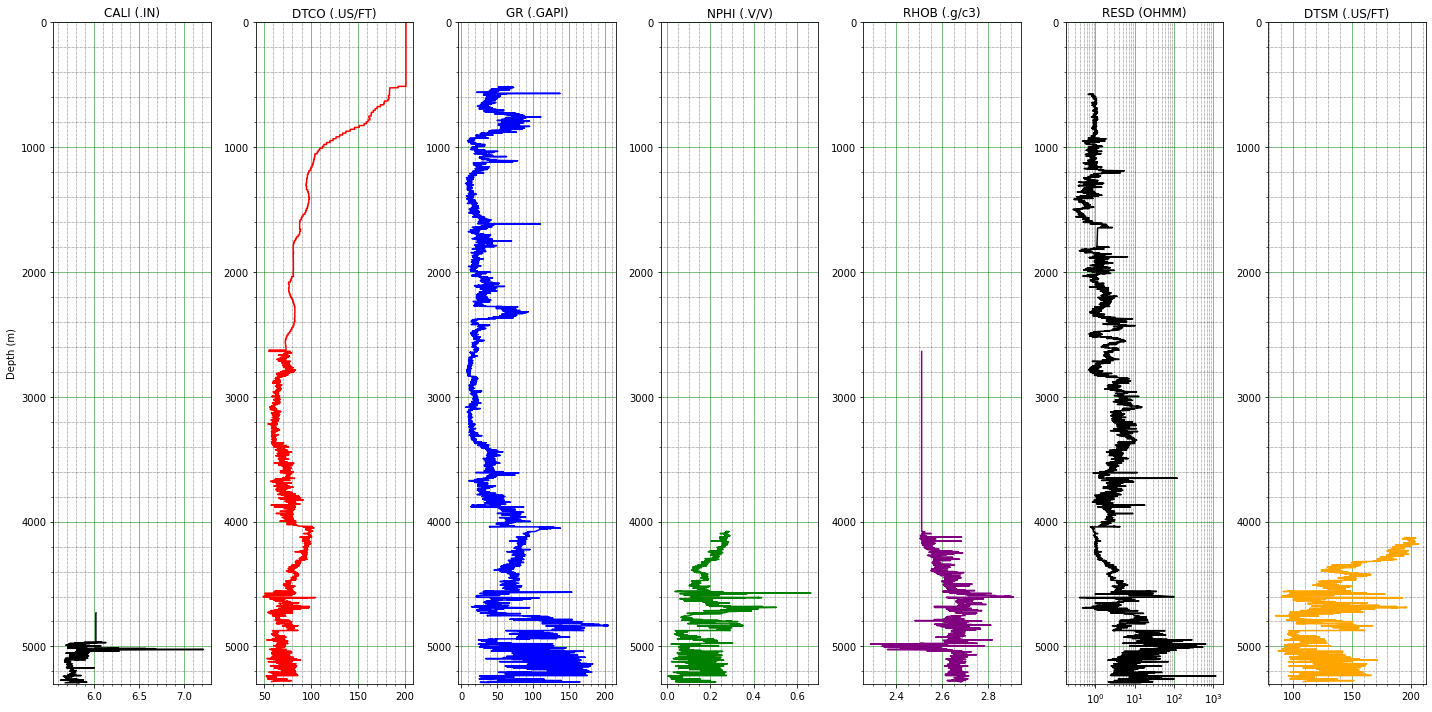

In [4]:
# plot data
logs = ['CALI', 'DTCO', 'GR', 'NPHI', 'RHOB', 'RESD', 'DTSM']
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))
colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange']
title = [' (.IN)', (' (.US/FT)'), (' (.GAPI)'), (' (.V/V)'), (' (.g/c3)'), (' (OHMM)'), (' (.US/FT)')]

for i in range(len(logs)):
    if i == 5:
        ax[i].semilogx(df[logs[i]], df['DEPT'], color=colors[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    else:
    # for non-resistivity, normal plot
        ax[i].plot(df[logs[i]], df['DEPT'], color=colors[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    
    ax[i].set_title(logs[i] + title[i])
    ax[i].grid(True)
    ax[i].set_ylim(max(df['DEPT']+10), 0)
    ax[0].set_ylabel('Depth (m)')
plt.tight_layout()
# plt.savefig('datalog.png', dpi=750)
plt.show()

Di atas adalah plot data log original, terlihat bahwa log CALI, NPHI, RHOB, RESD, dan DTSM tidak menjangkau Depth yang lebih rendah.

# **Descriptive Statistics** <br>
Hal yang perlu diperhatikan:



- A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya kurang sesuai?
- B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
- C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)



## DataFrame General Information

__Deskripsi:__
- DEPT  .M                             :0       Index TVD MSL
- ADJS  .S                             :1       Adjusted Sonic Travel Time    
- ADJS  .S                             :2       Adjusted Sonic Travel Time    
- CALI  .IN                            :3       Caliper                       
- DTCO  .US/F                          :4       Delta-T Compressional (ADJUSTED)
- DTCO  .US/F                          :5       Delta-T Compressional (INPUT) 
- DTSM  .US/F                          :6       Delta-T Shear                 
- GR    .GAPI                          :7       Gamma Ray                     
- NPHI  .V/V                           :8       Neutron Porosity
- RHOB  .G/C3                          :9       Bulk Density                  
- RESD  .OHMM                          :10      Deep

In [5]:
df.shape # (jumlah baris, jumlah kolom)

(34718, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34718 entries, 0 to 34717
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPT    34718 non-null  float64
 1   CALI    3673 non-null   float64
 2   DTCO    34660 non-null  float64
 3   GR      31334 non-null  float64
 4   NPHI    7929 non-null   float64
 5   RHOB    17362 non-null  float64
 6   RESD    30937 non-null  float64
 7   DTSM    7575 non-null   float64
dtypes: float64(8)
memory usage: 2.1 MB


**HASIL PENGAMATAN:**
*   Dataset terdiri dari 34,728 baris dan 8 kolom.
*   Terdapat 7 kolom yang missing value (Non-null count < Jumlah baris).
*   Semua kolom bertipe numerik.

## Checking Duplicated Data <br>
Cek data duplikat di keseluruhan DataFrame.

In [7]:
df.duplicated().sum()

0

**HASIL PENGAMATAN:** <br>
tidak terdapat data yang duplikat pada tabel df.

## Missing Value Calculation

In [8]:
mv = df.isnull().sum()
tmv = df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv, pmv], axis=1)
mdf.columns = ['Missing Value Total', 'Missing Value Percentage (%)']
mdf.sort_values(by='Missing Value Percentage (%)', ascending=False)

,Missing Value Total,Missing Value Percentage (%)
CALI,31045,89.420474
DTSM,27143,78.181347
NPHI,26789,77.161703
RHOB,17356,49.991359
RESD,3781,10.890604
GR,3384,9.747105
DTCO,58,0.167060
DEPT,0,0.000000


**HASIL PENGAMATAN:** <br>
- Semua kolom kecuali DEPT mengandung missing value. Kolom CALI, DTSM, NPHI, dan RHOB memiliki missing value >= 50% maka ini seharusnya di-drop. Atau, opsi lain adalah keempat kolom ini tetap dipakai, tetapi mising value dapat kita drop saja.


Kita dapat memanfaatkan library **missingno** untuk mengamati persebaran missing value di setiap kolom.

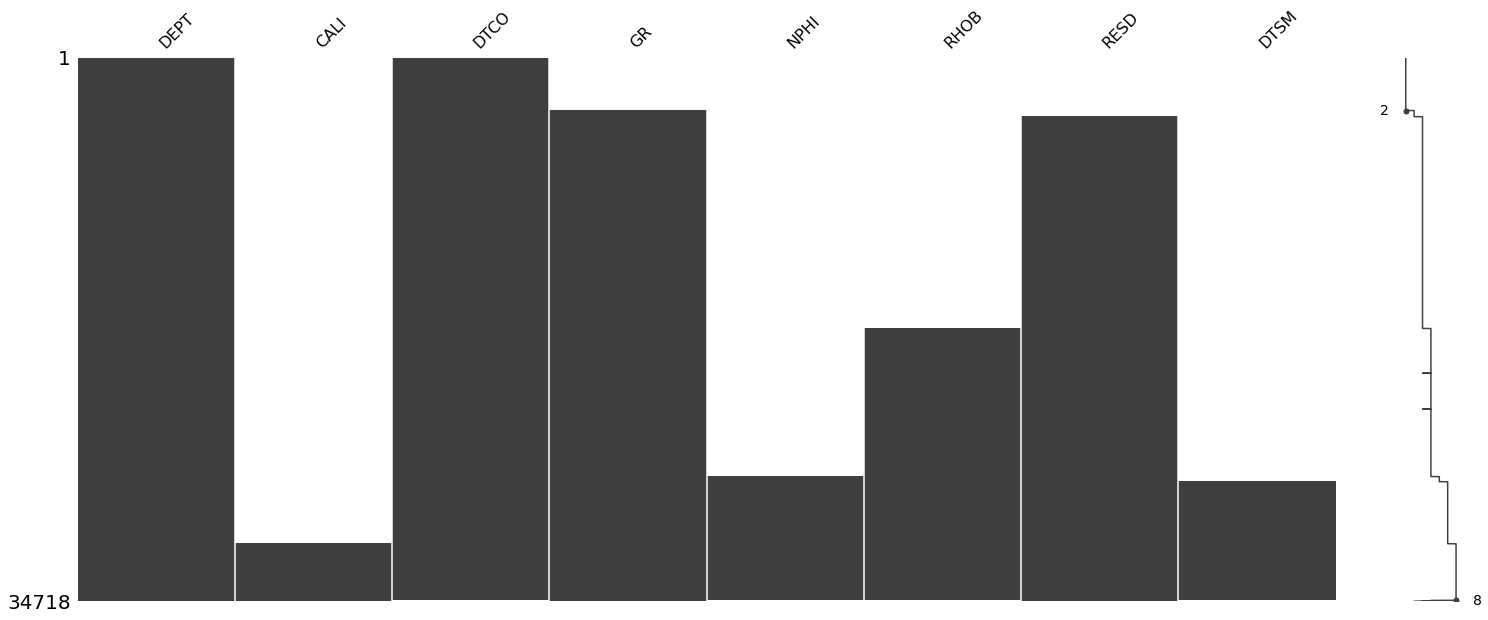

In [9]:
# Plot of Missing Values using matrix and heatmap missingno
import missingno as msno
msno.matrix(df);

## New Data

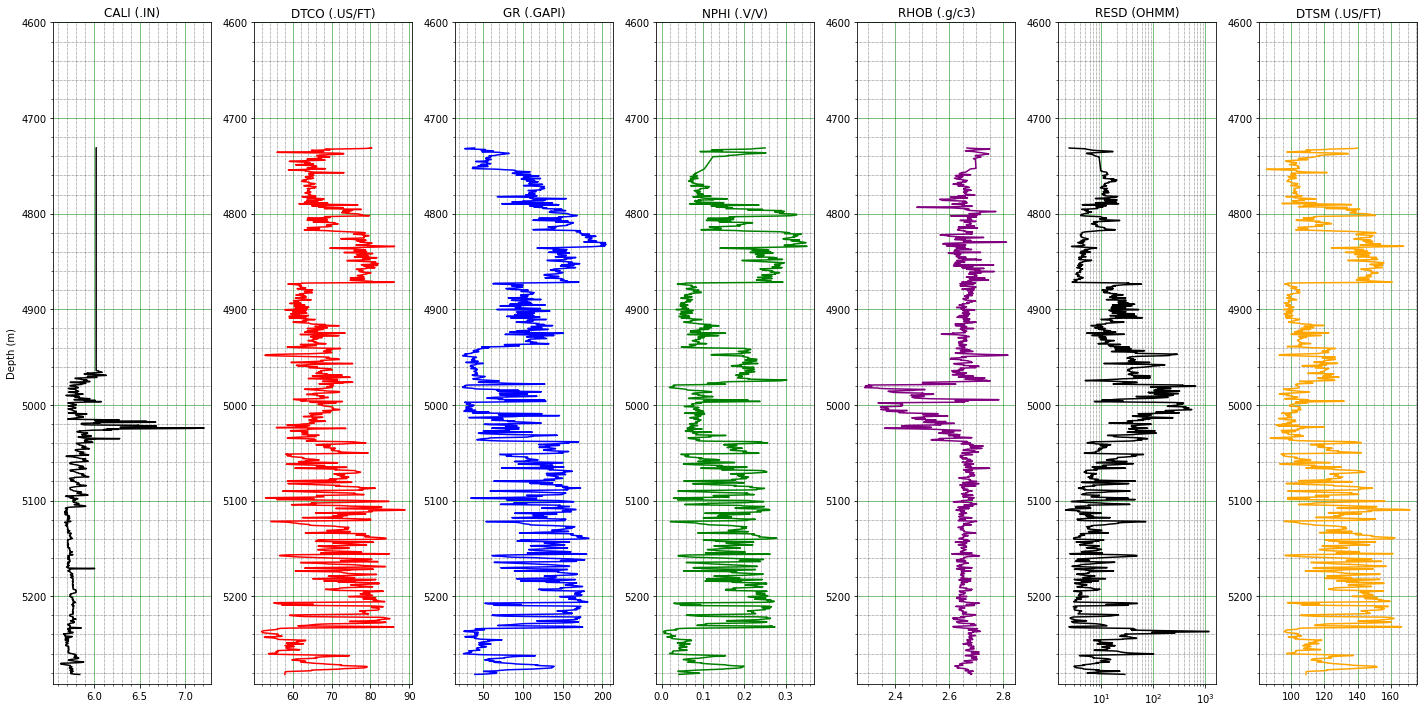

In [10]:
df = df.dropna()

# plot new data
logs = ['CALI', 'DTCO', 'GR', 'NPHI', 'RHOB', 'RESD', 'DTSM']
fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))
colors = ['black', 'red', 'blue', 'green', 'purple', 'black', 'orange']
title = [' (.IN)', (' (.US/FT)'), (' (.GAPI)'), (' (.V/V)'), (' (.g/c3)'), (' (OHMM)'), (' (.US/FT)')]

for i in range(len(logs)):
    if i == 5:
        ax[i].semilogx(df[logs[i]], df['DEPT'], color=colors[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    else:
    # for non-resistivity, normal plot
        ax[i].plot(df[logs[i]], df['DEPT'], color=colors[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='green')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    
    ax[i].set_title(logs[i] + title[i])
    ax[i].grid(True)
    ax[i].set_ylim(max(df['DEPT']+10), 4600)
    ax[0].set_ylabel('Depth (m)')
plt.tight_layout()
# plt.savefig('datalog.png', dpi=750)
plt.show()

## Descriptive statiscs <br>
Hal-hal yang perlu diperhatikan:
- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah terdapat keanehan dengan nilai maksimal dan nilai minimal di setiap kolom/feature?
- Bagaimana kira-kira distribusi data berdasarkan analisis singkat dari nilai mean dan median?


In [11]:
df.describe()

,DEPT,CALI,DTCO,GR,NPHI,RHOB,RESD,DTSM
count,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000,3614.000000
mean,5006.568600,5.889635,68.922640,108.405540,0.148491,2.644731,30.780290,120.128017
std,159.016639,0.152934,7.288801,44.206506,0.078603,0.067662,73.374894,18.800327
min,4731.258000,5.626210,51.957540,23.946020,0.004770,2.287270,2.070530,85.348680
25%,4868.913300,5.750407,63.651758,71.482042,0.081923,2.639230,5.249625,103.518890
50%,5006.568600,5.884270,67.842905,112.273470,0.133705,2.657260,10.296525,116.450675
75%,5144.223900,6.018800,74.743237,145.855108,0.211688,2.677455,22.765010,136.636732
max,5281.879200,7.211720,88.933650,204.670390,0.352120,2.817480,1188.496700,171.499190


**HASIL PENGAMATAN:** <br>

# **Univariate Analysis**

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun
target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.

## Boxplot
Hal yang perlu diperhatikan dari boxplot adalah keberadaan pencilan (outlier) dari setiap feature.

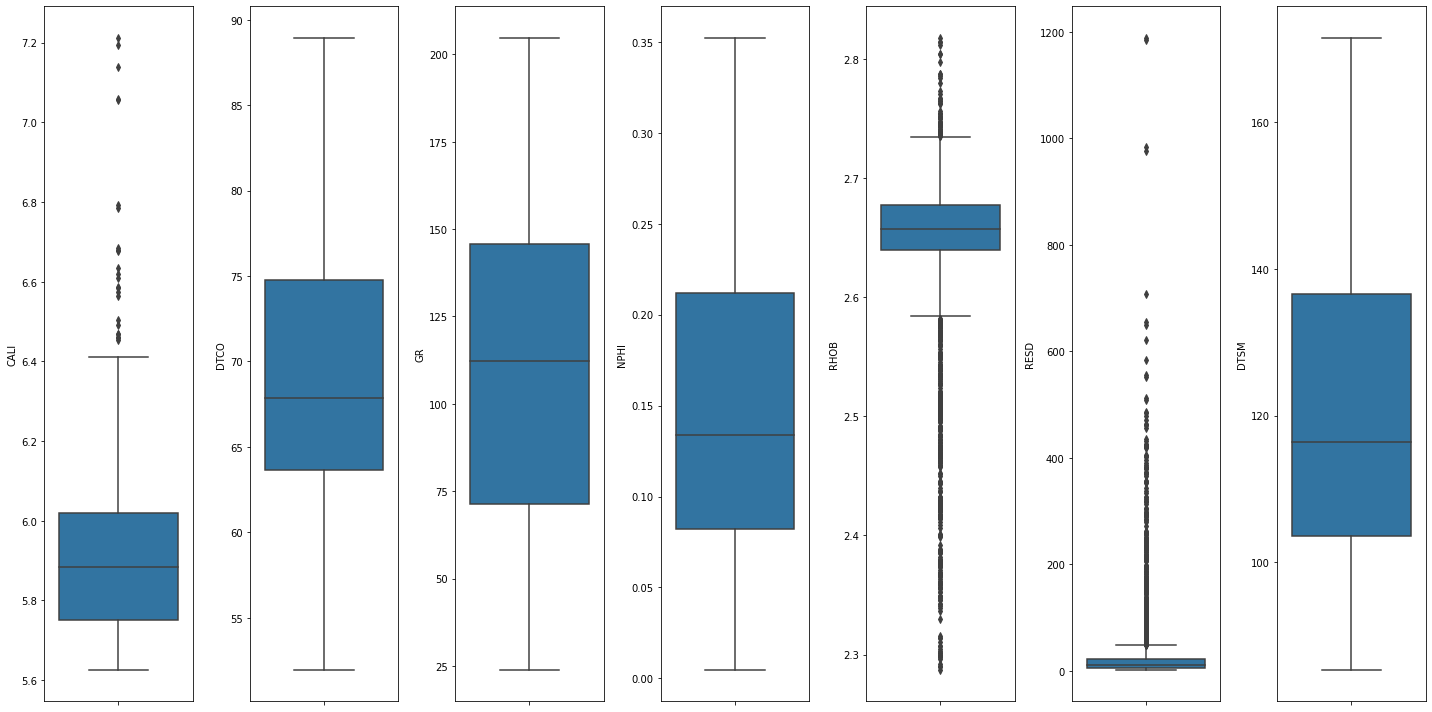

In [12]:
logs = ['CALI', 'DTCO', 'GR', 'NPHI', 'RHOB', 'RESD', 'DTSM']
plt.figure(figsize=(20,10))
for i in range(len(logs)):  
    plt.subplot(1, len(logs), i+1)
    sns.boxplot(y = df[logs[i]], orient = 'v')
    plt.tight_layout()

**HASIL PENGAMATAN:** <br>
- Terdapat outlier pada kolom CALI, DTCO, RHOB, RESD, dan DTSM.

# **Multivariate Analysis**

## Correlation Heatmap <br>

Hal- hal yang perlu diperhatikan:
- Apakah feature memiliki korelasi dengan target?
- Apakah ada 2 feature yang berkorelasi kuat (abs (>0.7))? Bila ya, ada kemungkinan besar kedua feature tersebut 
redundan [**Multicollinearity**](https://www.investopedia.com/terms/m/multicollinearity.asp#:~:text=Multicollinearity%20is%20a%20statistical%20concept,in%20less%20reliable%20statistical%20inferences).

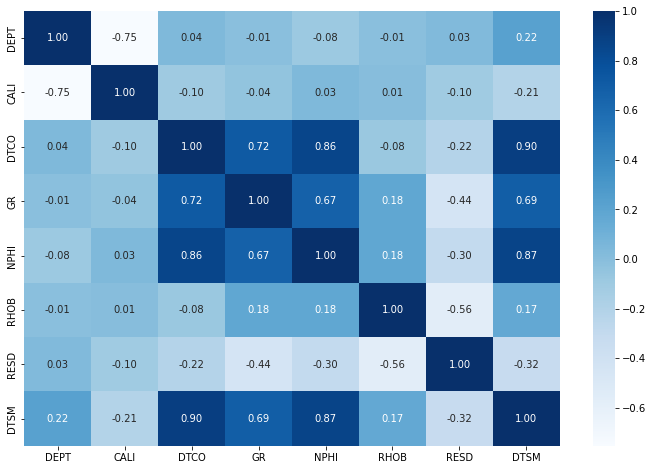

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f');

**HASIL PENGAMATAN:** <br>
- Target kita `DTSM` memiliki korelasi yang kuat dengan feature `DTCO`, `NPHI`, dan `GR`.
- Meskipun `RESD`, `DEPTH`, `CALI`, `RHOB` memiliki korelasi yang rendah dengan `DSTM` dan biasanya feature yang korelasinya rendah akan di-drop, tetapi untuk kasus ini kita akan tetap mempertahankan keempat feature tersebut.

## Pairplot

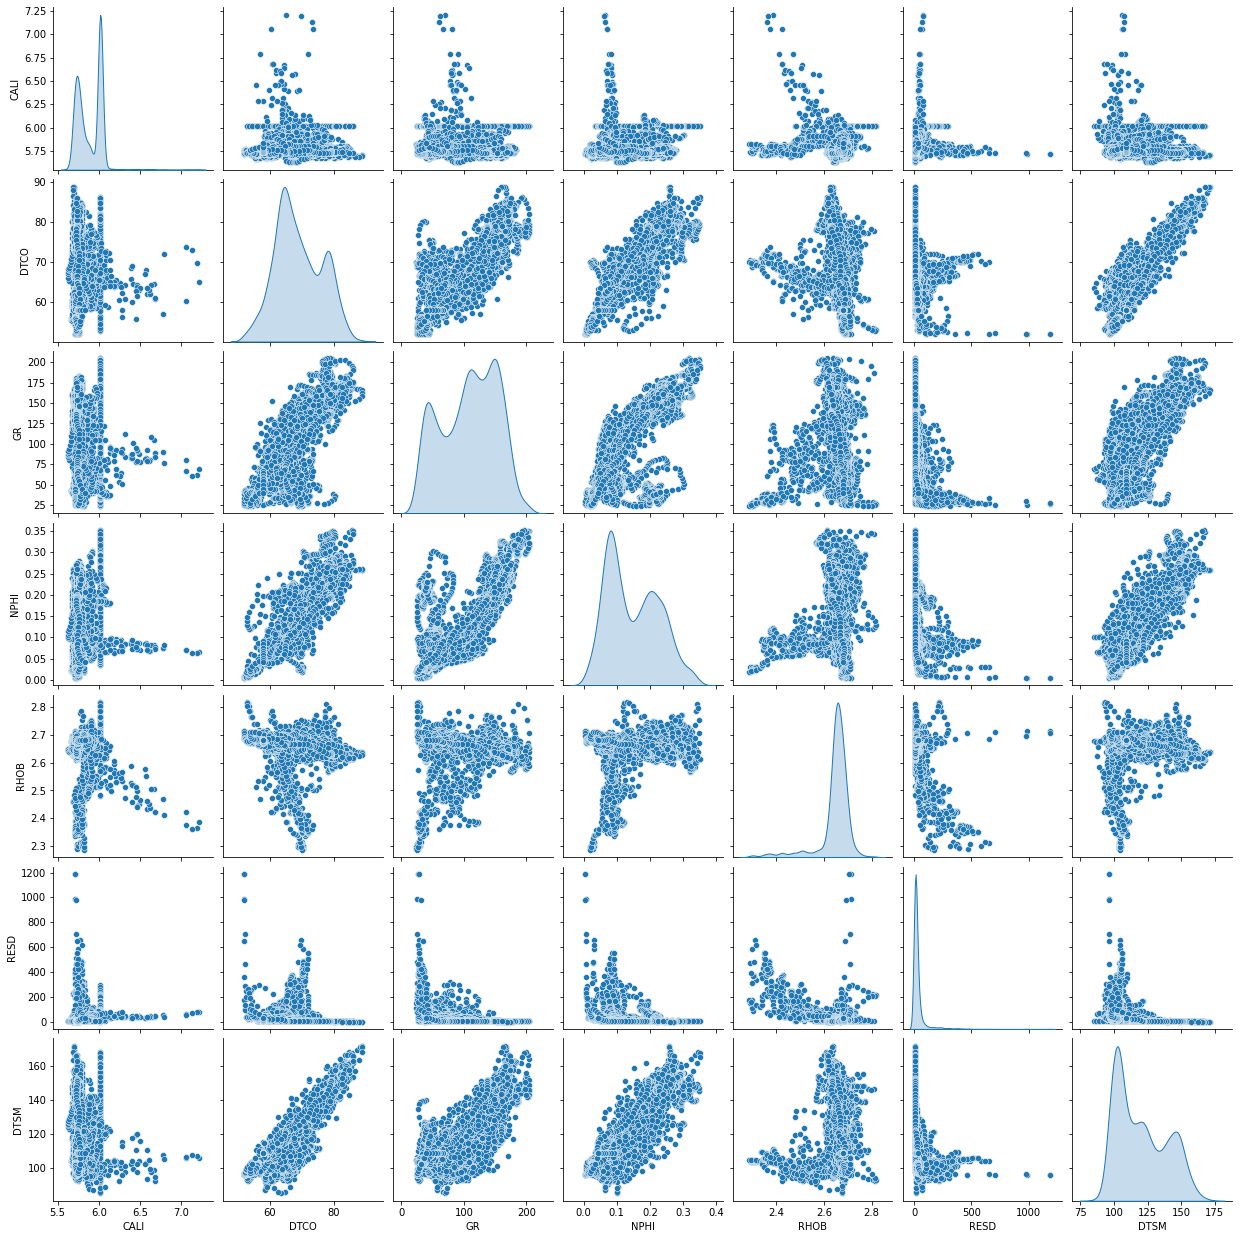

In [14]:
df_pairplot = df[logs]
sns.pairplot(df_pairplot, diag_kind='kde');

**HASIL PENGAMATAN:** <br>
- Pertama, `RESD` dan `CALI` memiliki distribusi data yang right skewed, sehingga bisa dilakukan log transformation.
- Kedua, `RHOB` distribusinya left skewed, bisa ditransformasi juga.
- Ketiga, seperti hasil dari nilai korelasi pearson sebelumnya, `DTCO`, `NPHI`, dan `GR` menunjukkan korelasi positif yang cukup kuat dengan DTSM.

# Data Pre-processing 

## Feature Transformation
- Log Transformation: RESD, CALI, RHOB.
- Kita menggunakan [Power Transformer](https://medium.com/towards-data-science/how-to-differentiate-between-scaling-normalization-and-log-transformations-69873d365a94)

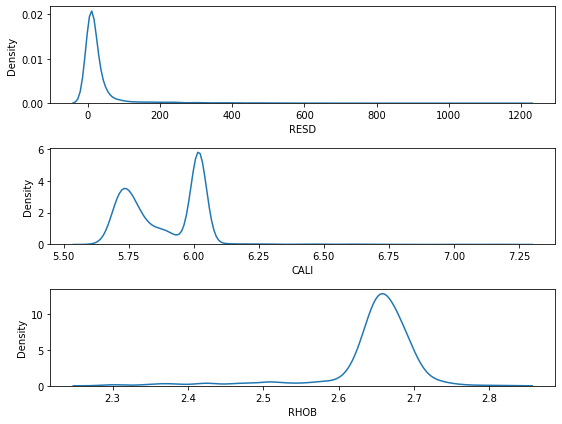

In [15]:
# KDE sebelum PowerTransformer
cols = ['RESD', 'CALI', 'RHOB']

plt.figure(figsize=(8, 6))
for i in range(len(cols)):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(data=df, x=df[cols[i]])
    plt.tight_layout()

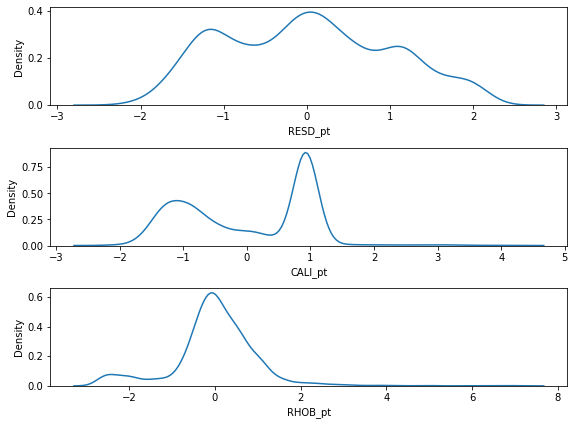

In [16]:
# Transformasi dengan PowerTransformer
from sklearn.preprocessing import PowerTransformer

pt_resd = PowerTransformer()
df['RESD_pt'] = pt_resd.fit_transform(df['RESD'].values.reshape(len(df), 1))


pt_cali = PowerTransformer()
df['CALI_pt'] = pt_cali.fit_transform(df['CALI'].values.reshape(len(df), 1))


pt_rhob = PowerTransformer()
df['RHOB_pt'] = pt_rhob.fit_transform(df['RHOB'].values.reshape(len(df), 1))

# KDE setelah Transformasi dengan PowerTransformer
cols = ['RESD_pt', 'CALI_pt', 'RHOB_pt']

plt.figure(figsize=(8, 6))
for i in range(len(cols)):
    plt.subplot(3, 1, i+1)
    sns.kdeplot(data=df, x=df[cols[i]])
    plt.tight_layout()

In [17]:
print(round(df['RESD_pt'].skew(), 2))
print(round(df['CALI_pt'].skew(), 2))
print(round(df['RHOB_pt'].skew(), 2))

0.16
0.04
0.34


## Handling Outliers

### Boxplot sebelum handling outlier

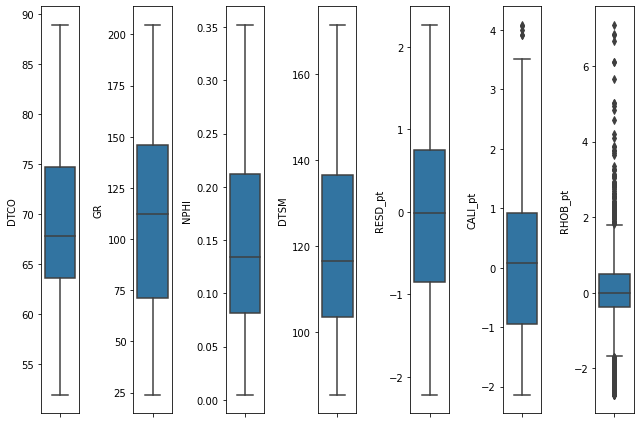

In [18]:
# boxplot sebelum Handling Outliers
cols = ['DTCO', 'GR', 'NPHI', 'DTSM', 'RESD_pt', 'CALI_pt', 'RHOB_pt']

plt.figure(figsize=(9,6))
for i in range(len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y = df[cols[i]], orient = 'v')
    plt.tight_layout()

In [19]:
rows_before_filt = len(df)
print('Jumlah Baris sebelum filter:', rows_before_filt)

Jumlah Baris sebelum filter: 3614


### Drop outliers

In [20]:
# kolom yang difilter dengan z-scores
cols = ['CALI_pt', 'RHOB_pt']

filtered_entries = np.array([True] * len(df))

for col in cols:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

In [21]:
rows_after_filt = len(df)
diff = (rows_before_filt - rows_after_filt) / rows_before_filt * 100
print(f'Jumlah baris setelah memfilter outlier: {len(df)}')
print(f'Persentase outlier yang dibuang:', round(diff, 2))

Jumlah baris setelah memfilter outlier: 3568
Persentase outlier yang dibuang: 1.27


### Boxplot setelah Handling Outliers

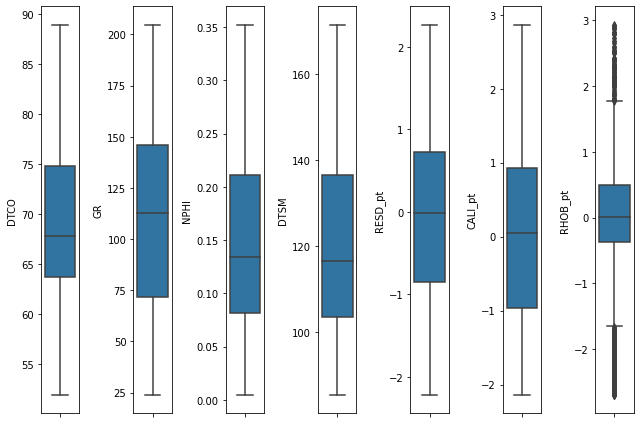

In [22]:
# boxplot setelah Handling Outliers
cols = ['DTCO', 'GR', 'NPHI', 'DTSM', 'RESD_pt', 'CALI_pt', 'RHOB_pt']

plt.figure(figsize=(9,6))
for i in range(len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y = df[cols[i]], orient = 'v')
    plt.tight_layout()

# Train-Split Data

In [23]:
X = df[['DTCO', 'GR', 'NPHI', 'RESD_pt', 'RHOB_pt']]
y = df[['DTSM']]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100)

In [25]:
# Standarisasi Features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform (X_test)

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(5).plot(kind='barh', figsize=(10, 8), color='#008B8B', edgecolor='black')
    ax.set_facecolor("#F5F5F5")
    
    ax.invert_yaxis()
    
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance Score', fontsize=15, fontweight='bold')
    
    
def evaluation(model):
    # Eval Train
    y_pred_train = model.predict(X_train)
    print('Train Score')
    print("MAE: %.2f" % mean_absolute_error(y_pred_train, y_train)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(y_pred_train, y_train, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(y_pred_train, y_train)) # Explained variance score: 1 is perfect prediction
    print('='*50)

    # Eval Test
    y_pred_test = model.predict(X_test)
    print('Test Score')
    print("MAE: %.2f" % mean_absolute_error(y_pred_test, y_test)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(y_pred_test, y_test, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(y_pred_test, y_test)) # Explained variance score: 1 is perfect prediction

# Modelling and Evaluation

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

evaluation(lr)

Train Score
MAE: 4.66
RMSE: 6.21
R2 score: 0.88
Test Score
MAE: 4.71
RMSE: 6.17
R2 score: 0.88


## Lasso Regression

In [28]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

evaluation(lasso)

Train Score
MAE: 5.28
RMSE: 6.51
R2 score: 0.84
Test Score
MAE: 5.42
RMSE: 6.57
R2 score: 0.84


## Ridge Regression

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

evaluation(ridge)

Train Score
MAE: 4.66
RMSE: 6.21
R2 score: 0.88
Test Score
MAE: 4.71
RMSE: 6.17
R2 score: 0.88


## KNN 

In [30]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

evaluation(knn)

Train Score
MAE: 1.95
RMSE: 3.17
R2 score: 0.97
Test Score
MAE: 2.52
RMSE: 3.88
R2 score: 0.96


## Extra Tree Regressor

In [31]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(random_state=100)
etr.fit(X_train, y_train)

evaluation(etr)

<ipython-input-31-2bb1dae05b54>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etr.fit(X_train, y_train)


Train Score
MAE: 0.00
RMSE: 0.00
R2 score: 1.00
Test Score
MAE: 2.41
RMSE: 3.87
R2 score: 0.96


## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=100)
dt.fit(X_train, y_train)

evaluation(dt)

Train Score
MAE: 0.00
RMSE: 0.00
R2 score: 1.00
Test Score
MAE: 3.18
RMSE: 5.09
R2 score: 0.93


## XGBoost

In [33]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(X_train, y_train)

evaluation(xg)

Train Score
MAE: 0.84
RMSE: 1.21
R2 score: 1.00
Test Score
MAE: 2.84
RMSE: 4.18
R2 score: 0.95


## Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=100)
rf.fit(X_train, y_train)

evaluation(rf)

<ipython-input-34-493e4b47b9db>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Train Score
MAE: 0.95
RMSE: 1.52
R2 score: 0.99
Test Score
MAE: 2.55
RMSE: 3.98
R2 score: 0.95


# Hyperparameter Tuning

## KNN

In [35]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn_tuned = GridSearchCV(knn, hyperparameters, cv=5, scoring='r2', return_train_score=True)
knn_tuned.fit(X_train, y_train)
evaluation(knn_tuned)

Train Score
MAE: 1.29
RMSE: 2.21
R2 score: 0.99
Test Score
MAE: 2.34
RMSE: 3.93
R2 score: 0.96


In [36]:
knn_tuned.cv_results_

{'mean_fit_time': array([0.00498028, 0.00378871, 0.00398893, 0.00398908, 0.00378923,
        0.0046989 , 0.00418835, 0.00399122, 0.00379591, 0.0037848 ,
        0.00437183, 0.00378094, 0.00440159, 0.00498648, 0.00418849,
        0.00358987, 0.00378437, 0.00378108, 0.00399823, 0.00399799,
        0.00378561, 0.0038074 , 0.00418777, 0.00339203, 0.00358658,
        0.00398059, 0.00379024, 0.00517974, 0.00340242, 0.00399952,
        0.00436616, 0.00476074, 0.00479116, 0.00398841, 0.00379395,
        0.00359192, 0.00398154, 0.00412579, 0.00400705, 0.00438375,
        0.00379376, 0.00399051, 0.00377412, 0.00372391, 0.00417919,
        0.00401835, 0.00528808, 0.00379243, 0.00380301, 0.00458169,
        0.00379195, 0.00419087, 0.0035996 , 0.00398884, 0.00618348,
        0.00449591, 0.00418568, 0.00480251, 0.00359316, 0.00339656,
        0.00398636, 0.00298901, 0.00299191, 0.00337162, 0.0039907 ,
        0.00279489, 0.00318823, 0.0033905 , 0.00340252, 0.0029985 ,
        0.0042686 , 0.00378947,

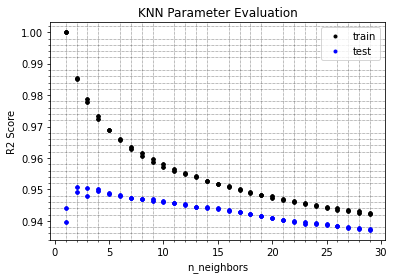

1.0


In [37]:
test = pd.DataFrame(knn_tuned.cv_results_)

results = test[['param_n_neighbors', 'mean_test_score', 'mean_train_score', 'rank_test_score']]

nbors = results["param_n_neighbors"].values
trn_score = results["mean_train_score"].values
tst_score = results["mean_test_score"].values


plt.plot(nbors, trn_score, 'k.', label='train')
plt.plot(nbors, tst_score, 'b.', label='test')
plt.title('KNN Parameter Evaluation')
plt.xlabel("n_neighbors")
plt.ylabel("R2 Score")
plt.minorticks_on()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.grid()
plt.legend()
plt.savefig("performance plot KNN.png", dpi=500)
plt.show()
print(trn_score[0])

In [38]:
results

,param_n_neighbors,mean_test_score,mean_train_score,rank_test_score
0,1,0.939506,1.000000,177
1,1,0.944067,1.000000,101
2,2,0.949212,0.985208,17
3,2,0.950716,0.985525,1
4,3,0.947983,0.977962,37
...,...,...,...,...
227,27,0.937747,0.943013,213
228,28,0.937677,0.943066,217
229,28,0.937380,0.942534,225
230,29,0.937409,0.942608,221


## Extra Tree Regressor

In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

hyperparameters = {'n_estimators': [5, 10, 15, 20,50,100],
          'max_depth': [None, 2,5,7, 10, 13, 15, 25],
          'min_samples_split': [0.5, 1, 3, 5, 7, 10],
          'min_samples_leaf': [1, 0.5, 3, 5, 7, 10],
          'criterion': ['mse', 'mae'],
          'max_features': [None, 'sqrt', 'auto', 'log2'],
          'bootstrap':[True, False]
         }


etr_tuned = RandomizedSearchCV(etr, hyperparameters, random_state=100, cv=5, scoring='r2')
etr_tuned.fit(X_train, y_train)

evaluation(etr_tuned)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

Train Score
MAE: 1.55
RMSE: 2.42
R2 score: 0.98
Test Score
MAE: 2.54
RMSE: 3.98
R2 score: 0.95


## XGBoost

In [40]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [3, 5, 7, 12, 15, 30],
                    'min_child_weight' : [1, 3, 5, 7, 15, 30],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'n_estimators' : [10, 100, 200, 300, 500],
                    'learning_rate' : [0.9, 0,5, 0.3, 0.1]
                    }

# Init
xg = XGBRegressor(random_state=100)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, random_state=100, cv=5, scoring='r2')
xg_tuned.fit(X_train,y_train)

evaluation(xg_tuned)

Train Score
MAE: 1.46
RMSE: 2.17
R2 score: 0.99
Test Score
MAE: 2.78
RMSE: 4.13
R2 score: 0.95


# Predict All Data Kronos-1

In [43]:
X_new = X.copy()
X_new = ss.transform(X_new)

y_new = y.copy()
y_new = np.ravel(y_new)

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn import metrics

def predict_all(model):
    DTSM_predict = model.predict(X_new)
    DTSM_predict = np.ravel(DTSM_predict)

    df_result = pd.DataFrame({'Original':y_new, 'Predicted':DTSM_predict})

    RMSE = metrics.mean_squared_error(DTSM_predict, y_new, squared=False)
    r2score = r2_score(DTSM_predict, y_new)
#     print('Root Mean Squared Error:', RMSE)
#     print('r2 Score : ', r2score)

    # title
    t1 = str(np.round(RMSE, 3))
    t2 = str(np.round(r2score, 3))

    # S-sonic to Vs
    vs_ori  = 1/y_new         # ft/us
    vs_pred = 1/DTSM_predict  # ft/us
    vs_ori  = vs_ori* 10**6 *0.3048 # m/s
    vs_pred = vs_pred* 10**6 *0.3048 # m/s

    
    plt.figure(figsize=(6,14))
    plt.plot(vs_ori, df['DEPT'], 'k', label='Vs Original')
    plt.plot(vs_pred, df['DEPT'], 'b', label='Vs Predicted')
    plt.title("RMSE=" + t1 + " & R2Score=" + t2)
    plt.ylabel("Depth (m)")
    plt.xlabel("Vs (m/s)")
    plt.xlim(1000, 5000)
    plt.ylim((np.min(df["DEPT"]))-10, (np.max(df["DEPT"]))+10)
    plt.gca().invert_yaxis()
    plt.legend()
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    # plt.savefig("HasilKNN_to_alldepth.png", dpi=500)
    plt.show()

## KNN

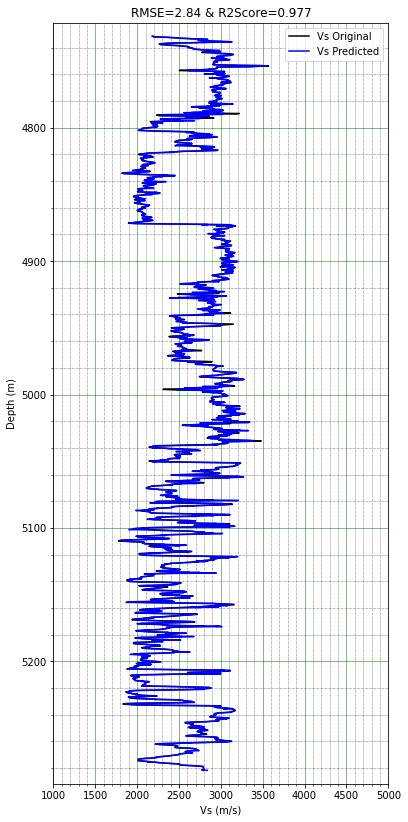

In [45]:
predict_all(knn_tuned)

## Extra Tree Regressor

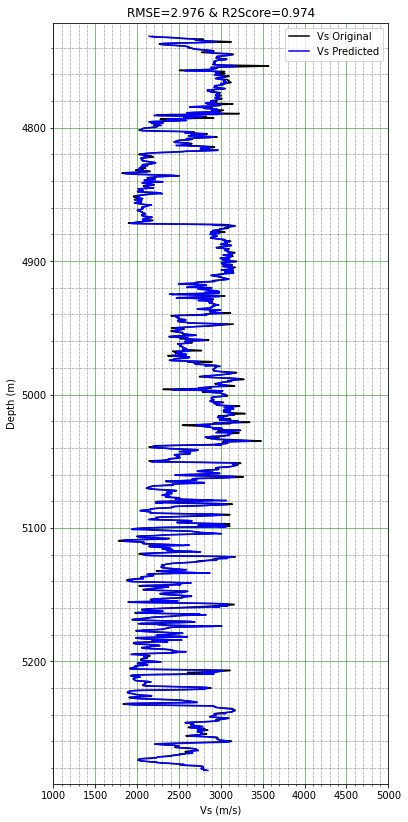

In [46]:
predict_all(etr_tuned)

## XGBoost

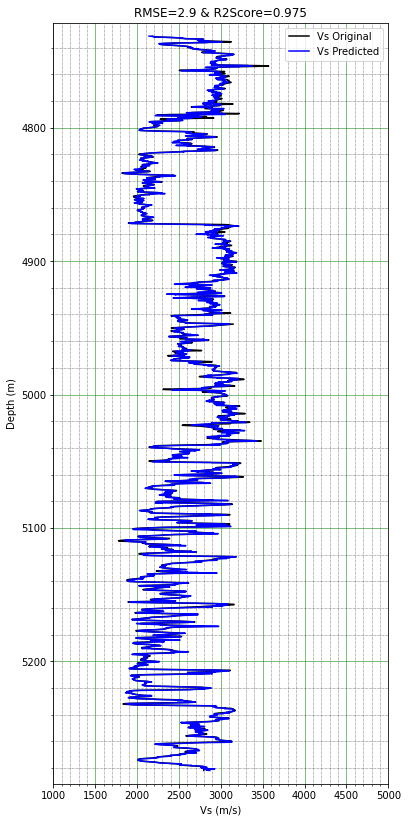

In [47]:
predict_all(xg_tuned)

# Predict New Well

In [73]:
filename2 = "E:\poseidon2.csv"
data2all = np.loadtxt(filename2, skiprows=1,delimiter=',')
mneumonics =  ['DEPT','GR','RESD','DTCO','DTSM','RHOB','NPHI']
data2all = pd.DataFrame(data2all, columns=mneumonics)
data2all[data2all==-999.2500]= np.nan
data2=data2all.dropna()


# Transformasi dengan PowerTransformer
from sklearn.preprocessing import PowerTransformer

pt_resd1 = PowerTransformer()
data2['RESD_pt'] = pt_resd1.fit_transform(data2['RESD'].values.reshape(len(data2), 1))

pt_rhob1 = PowerTransformer()
data2['RHOB_pt'] = pt_rhob1.fit_transform(data2['RHOB'].values.reshape(len(data2), 1))


X2 = data2[['DTCO', 'GR', 'NPHI', 'RESD_pt', 'RHOB_pt']].values
y2 = data2[['DTSM']].values
print(X2.shape)
print(y2.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2= scaler.fit_transform(X2)

(1183, 5)
(1183, 1)


<ipython-input-73-9381776317f8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['RESD_pt'] = pt_resd1.fit_transform(data2['RESD'].values.reshape(len(data2), 1))
<ipython-input-73-9381776317f8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['RHOB_pt'] = pt_rhob1.fit_transform(data2['RHOB'].values.reshape(len(data2), 1))


## KNN

Mean Absolute Error: 9.427944175824175
Mean Squared Error: 171.74814339753672
Root Mean Squared Error: 13.105271588087625
r2 Score :  0.7082422732402034


<ipython-input-74-0fcf10fa43bf>:15: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t1 = np.str(np.round(RMSE, 3))
<ipython-input-74-0fcf10fa43bf>:16: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t2 = np.str(np.round(r2score, 3))


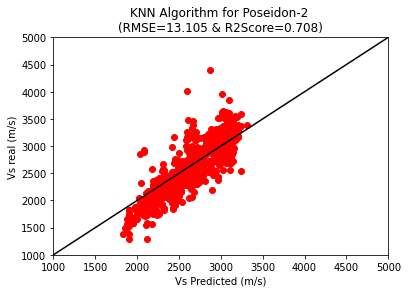

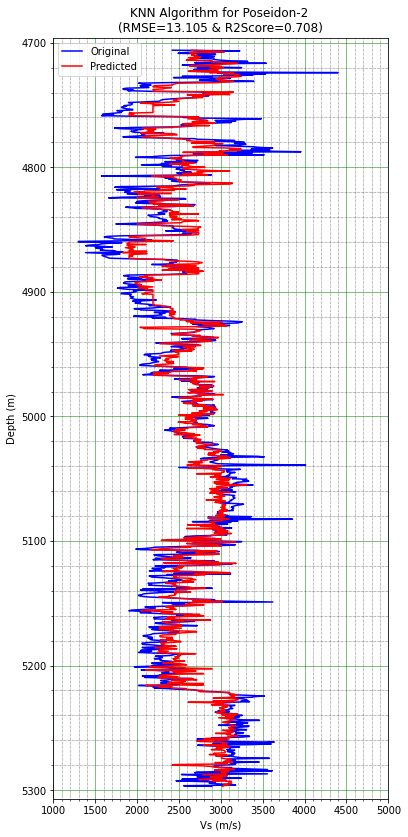

Vs_max = 3313.161599674424
Vs_min = 1825.9764743179976


In [74]:
ypredpos2 = knn_tuned.predict(X2)

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

MAE = metrics.mean_absolute_error(y2, ypredpos2)
MSE = metrics.mean_squared_error(y2, ypredpos2)
RMSE = np.sqrt(metrics.mean_squared_error(y2, ypredpos2))
r2score = r2_score(y2, ypredpos2)

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score : ', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

vs_ori  = 1/y2                      # ft/us
vs_pred = 1/ypredpos2              # ft/us
vs_ori_pos  = vs_ori* 10**6 *0.3048    # m/s
vs_pred_pos = vs_pred* 10**6 *0.3048   # m/s

plt.scatter (vs_pred_pos, vs_ori_pos, color='red')
s = np.arange(1000, 5000,0.01)
t = s
plt.plot(s,t,color='black')
plt.xlim(1000, 5000)
plt.ylim(1000, 5000)
plt.xlabel("Vs Predicted (m/s)")
plt.ylabel("Vs real (m/s)")
plt.title("KNN Algorithm for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.savefig("Predict POS2 KNN.png", dpi=500)
plt.show()


plt.figure(figsize=(6,14))
plt.plot(vs_ori_pos, data2['DEPT'],label='Original',color='blue')
plt.plot(vs_pred_pos, data2['DEPT'],label='Predicted',color='red')
plt.title("KNN Algorithm for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.ylabel("Depth (m)")
plt.xlabel("Vs (m/s)")
plt.xlim(1000, 5000)
plt.ylim((np.min(data2["DEPT"]))-10,(np.max(data2["DEPT"]))+10)
plt.gca().invert_yaxis()
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("HasilKNN_poseidon2.png", dpi=500)
plt.show()
print("Vs_max =",np.max(vs_pred_pos))
print("Vs_min =",np.min(vs_pred_pos))

## Extra Tree

Mean Absolute Error: 8.39636379539307
Mean Squared Error: 139.19822125892293
Root Mean Squared Error: 11.798229581548366
r2 Score :  0.763536561152177


<ipython-input-78-d7a8fae8509e>:15: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t1 = np.str(np.round(RMSE, 3))
<ipython-input-78-d7a8fae8509e>:16: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t2 = np.str(np.round(r2score, 3))


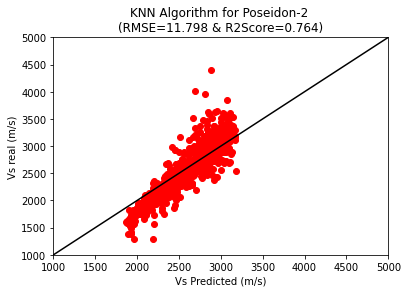

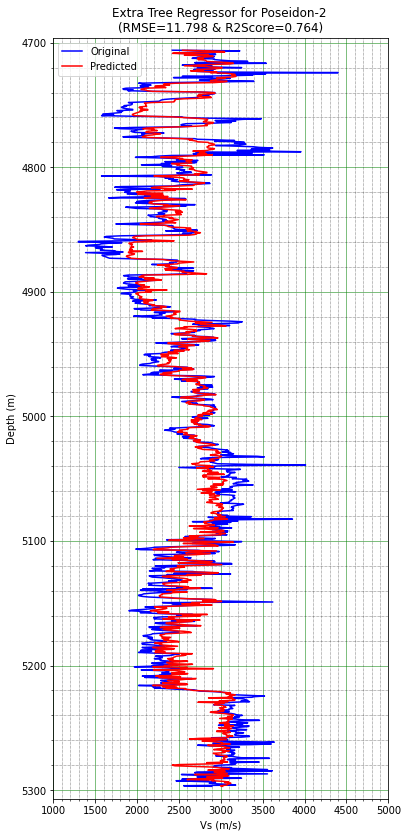

Vs_max = 3181.832503053819
Vs_min = 1871.1613899898064


In [78]:
ypredpos2 = etr_tuned.predict(X2)

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

MAE = metrics.mean_absolute_error(y2, ypredpos2)
MSE = metrics.mean_squared_error(y2, ypredpos2)
RMSE = np.sqrt(metrics.mean_squared_error(y2, ypredpos2))
r2score = r2_score(y2, ypredpos2)

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score : ', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

vs_ori  = 1/y2                      # ft/us
vs_pred = 1/ypredpos2              # ft/us
vs_ori_pos  = vs_ori* 10**6 *0.3048    # m/s
vs_pred_pos = vs_pred* 10**6 *0.3048   # m/s

plt.scatter (vs_pred_pos, vs_ori_pos, color='red')
s = np.arange(1000, 5000,0.01)
t = s
plt.plot(s,t,color='black')
plt.xlim(1000, 5000)
plt.ylim(1000, 5000)
plt.xlabel("Vs Predicted (m/s)")
plt.ylabel("Vs real (m/s)")
plt.title("KNN Algorithm for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.savefig("Predict POS2 KNN.png", dpi=500)
plt.show()


plt.figure(figsize=(6,14))
plt.plot(vs_ori_pos, data2['DEPT'],label='Original',color='blue')
plt.plot(vs_pred_pos, data2['DEPT'],label='Predicted',color='red')
plt.title("Extra Tree Regressor for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.ylabel("Depth (m)")
plt.xlabel("Vs (m/s)")
plt.xlim(1000, 5000)
plt.ylim((np.min(data2["DEPT"]))-10,(np.max(data2["DEPT"]))+10)
plt.gca().invert_yaxis()
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("HasilKNN_poseidon2.png", dpi=500)
plt.show()
print("Vs_max =",np.max(vs_pred_pos))
print("Vs_min =",np.min(vs_pred_pos))

## XGBoost

Mean Absolute Error: 8.471172708111824
Mean Squared Error: 141.98804892123002
Root Mean Squared Error: 11.915873821135822
r2 Score :  0.758797332181752


<ipython-input-83-b9ed1afc34c4>:15: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t1 = np.str(np.round(RMSE, 3))
<ipython-input-83-b9ed1afc34c4>:16: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  t2 = np.str(np.round(r2score, 3))


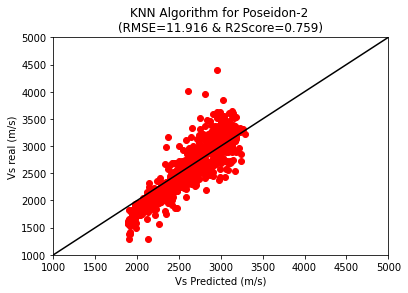

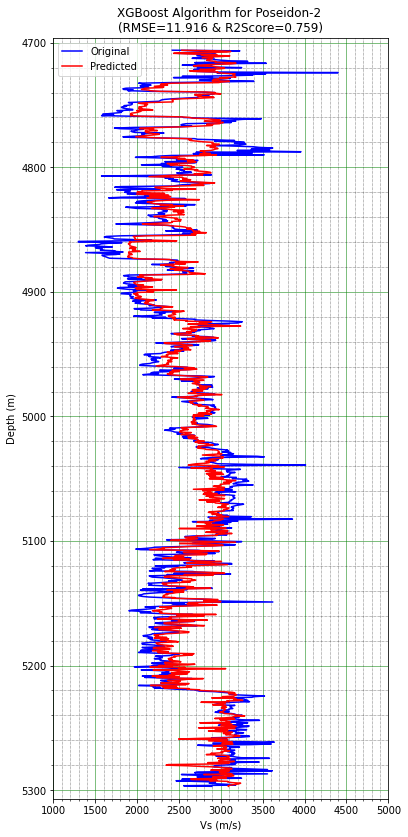

Vs_max = 3285.375579446554
Vs_min = 1886.8133716285229


In [83]:
ypredpos2 = xg_tuned.predict(X2)

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

MAE = metrics.mean_absolute_error(y2, ypredpos2)
MSE = metrics.mean_squared_error(y2, ypredpos2)
RMSE = np.sqrt(metrics.mean_squared_error(y2, ypredpos2))
r2score = r2_score(y2, ypredpos2)

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score : ', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

vs_ori  = 1/y2                      # ft/us
vs_pred = 1/ypredpos2              # ft/us
vs_ori_pos  = vs_ori* 10**6 *0.3048    # m/s
vs_pred_pos = vs_pred* 10**6 *0.3048   # m/s

plt.scatter (vs_pred_pos, vs_ori_pos, color='red')
s = np.arange(1000, 5000,0.01)
t = s
plt.plot(s,t,color='black')
plt.xlim(1000, 5000)
plt.ylim(1000, 5000)
plt.xlabel("Vs Predicted (m/s)")
plt.ylabel("Vs real (m/s)")
plt.title("KNN Algorithm for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.savefig("Predict POS2 KNN.png", dpi=500)
plt.show()


plt.figure(figsize=(6,14))
plt.plot(vs_ori_pos, data2['DEPT'],label='Original',color='blue')
plt.plot(vs_pred_pos, data2['DEPT'],label='Predicted',color='red')
plt.title("XGBoost Algorithm for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.ylabel("Depth (m)")
plt.xlabel("Vs (m/s)")
plt.xlim(1000, 5000)
plt.ylim((np.min(data2["DEPT"]))-10,(np.max(data2["DEPT"]))+10)
plt.gca().invert_yaxis()
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("HasilKNN_poseidon2.png", dpi=500)
plt.show()
print("Vs_max =",np.max(vs_pred_pos))
print("Vs_min =",np.min(vs_pred_pos))